In [4]:
import pandas  as pd
import numpy as np

In [5]:
train=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/train.csv')
test=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/test.csv')

In [6]:
train

,Gender,Age,PIR,Drinking,Sleep_disorder,Moderate_physical_activity,Total_cholesterol,Depression
0,0,62,0.23,0,0,1,2.61,0
1,0,75,2.14,1,1,1,3.03,0
2,0,69,4.99,1,0,1,4.86,0
3,0,70,3.84,1,0,0,4.37,1
4,0,68,1.08,1,1,0,4.91,0
...,...,...,...,...,...,...,...,...
801,1,70,0.89,0,1,0,5.40,1
802,1,74,2.18,1,1,1,4.76,0
803,1,68,1.32,0,0,0,3.83,0
804,1,73,2.72,1,1,0,4.42,0


In [7]:
depression_=train['Depression'].value_counts()
depression_

Depression
0    661
1    145
Name: count, dtype: int64

In [8]:
test

,Gender,Age,PIR,Drinking,Sleep_disorder,Moderate_physical_activity,Total_cholesterol,Depression
0,0,55,3.79,1,1,0,4.97,0
1,0,44,0.08,1,0,0,3.72,0
2,0,84,1.84,1,0,1,7.34,0
3,0,46,0.99,1,1,1,5.64,0
4,1,58,3.70,1,1,1,3.93,0
...,...,...,...,...,...,...,...,...
332,1,55,1.24,0,1,0,3.31,0
333,1,51,3.34,1,1,0,4.91,0
334,1,57,0.60,1,1,1,3.23,1
335,1,64,1.06,0,0,0,6.23,0


In [9]:
depression_=test['Depression'].value_counts()
depression_

Depression
0    282
1     55
Name: count, dtype: int64

In [10]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [12]:
# XGBoost模型参数
params_xgb = {
    'learning_rate': 0.02,            # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1
    'booster': 'gbtree',              # 提升方法，这里使用梯度提升树（Gradient Boosting Tree）
    'objective': 'binary:logistic',   # 损失函数，这里使用逻辑回归，用于二分类任务
    'max_leaves': 127,                # 每棵树的叶子节点数量，控制模型复杂度。较大值可以提高模型复杂度但可能导致过拟合
    'verbosity': 1,                   # 控制 XGBoost 输出信息的详细程度，0表示无输出，1表示输出进度信息
    'seed': 42,                       # 随机种子，用于重现模型的结果
    'nthread': -1,                    # 并行运算的线程数量，-1表示使用所有可用的CPU核心
    'colsample_bytree': 0.6,          # 每棵树随机选择的特征比例，用于增加模型的泛化能力
    'subsample': 0.7,                 # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力
    'eval_metric': 'logloss'          # 评价指标，这里使用对数损失（logloss）
}

In [13]:

# 初始化XGBoost分类模型
model_xgb = xgb.XGBClassifier(**params_xgb)

In [14]:

# 定义参数网格，用于网格搜索
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # 树的数量
    'max_depth': [3, 4, 5, 6, 7],               # 树的深度
    'learning_rate': [0.01, 0.02, 0.05, 0.1],   # 学习率
}

In [15]:
# 使用GridSearchCV进行网格搜索和k折交叉验证
grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='neg_log_loss',  # 评价指标为负对数损失
    cv=5,                    # 5折交叉验证
    n_jobs=-1,               # 并行计算
    verbose=1                # 输出详细进度信息
)

In [16]:

# 训练模型
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_ra...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=127, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_log_loss', verbose=1)

In [14]:
# 输出最优参数
print("Best parameters found: ", grid_search.best_params_)
print("Best Log Loss score: ", -grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Log Loss score:  0.4234133697191562


In [25]:

# 使用最优参数训练模型
best_model = grid_search.best_estimator_

In [26]:

from sklearn.metrics import classification_report

# 预测测试集
y_pred = best_model.predict(X_test)

# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       282
           1       0.44      0.07      0.12        55

    accuracy                           0.83       337
   macro avg       0.64      0.53      0.52       337
weighted avg       0.78      0.83      0.78       337



In [19]:
#计算混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm =confusion_matrix(y_test,y_pred)
cm

array([[277,   5],
       [ 51,   4]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
# y_true 是真实标签，y_pred 是模型预测的标签
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.834


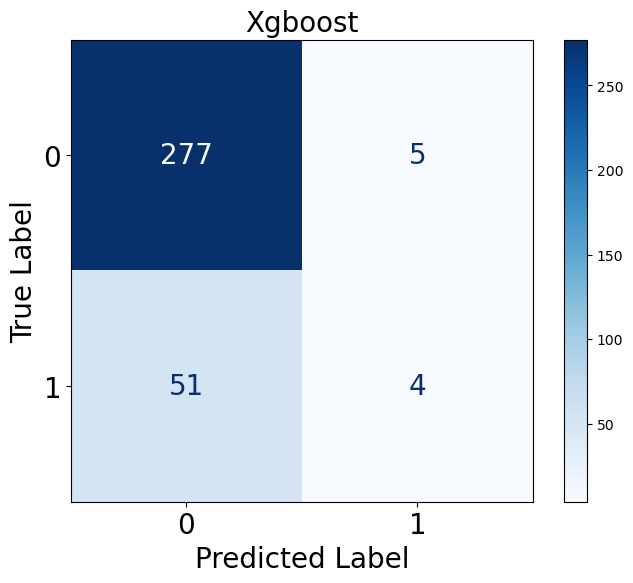

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 计算混淆矩阵
confusion_matrix_model = confusion_matrix(y_test, y_pred)
# 使用 ConfusionMatrixDisplay 绘制混淆矩阵热力图
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model)
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整图的大小
cm_display.plot(cmap='Blues', ax=ax, values_format='d')

# 修改数字字体大小
for texts in ax.texts:
    texts.set_fontsize(20)

# 设置图形标签和标题
plt.title('Xgboost', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [22]:
# 提取混淆矩阵中的各项指标
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 计算敏感度/召回率
sensitivity = TP / (TP + FN)
print(f"Sensitivity/Recall: {sensitivity:.3f}")

# 计算特异度
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.3f}")

# 计算假阳性率
FPR = FP / (FP + TN)
print(f"False Positive Rate: {FPR:.3f}")

# 计算假阴性率
FNR = FN / (FN + TP)
print(f"False Negative Rate: {FNR:.3f}")

# 计算阳性预测值
PPV = TP / (TP + FP)
print(f"Positive Predictive Value: {PPV:.3f}")

# 计算阴性预测值
NPV = TN / (TN + FN)
print(f"Negative Predictive Value: {NPV:.3f}")

# 计算F1分数
F1_score = 2 * (PPV * sensitivity) / (PPV + sensitivity)
print(f"F1 Score: {F1_score:.3f}")


Sensitivity/Recall: 0.073
Specificity: 0.982
False Positive Rate: 0.018
False Negative Rate: 0.927
Positive Predictive Value: 0.444
Negative Predictive Value: 0.845
F1 Score: 0.125


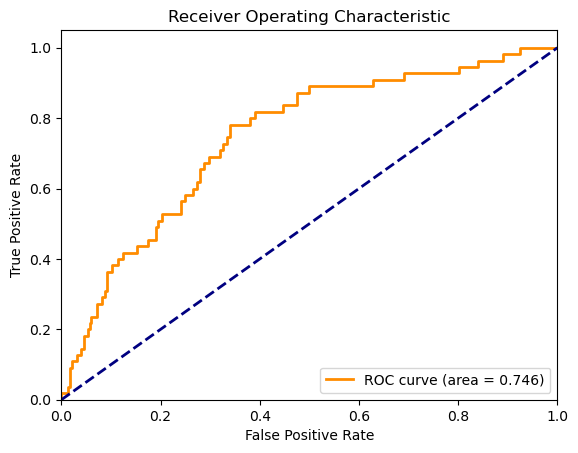

In [23]:

from sklearn.metrics import roc_curve, auc
# 预测概率
y_score = best_model.predict_proba(X_test)[:, 1]
# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
import joblib
# 保存模型
joblib.dump(best_model, 'XGBoost.pkl')

['XGBoost.pkl']

In [23]:
import os
print(os.getcwd())

C:\Users\19850\机器学习\卒中患者抑郁症风险


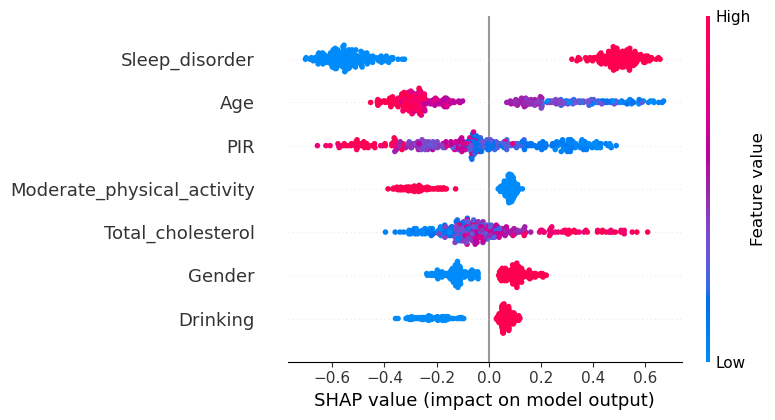

In [27]:
import shap
# 创建 SHAP 值解释器
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# 绘制 SHAP 图
shap.summary_plot(shap_values, X_test)

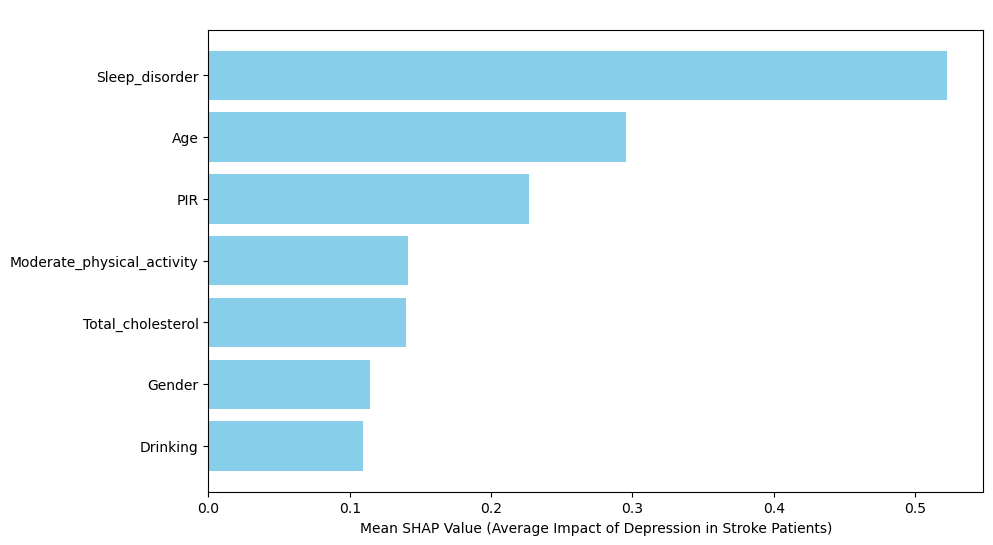

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

# 计算每个特征的平均绝对 SHAP 值作为特征重要性
shap_values_array = shap_values.values  # 获取 SHAP 值的数组形式
shap_importance = np.abs(shap_values_array).mean(axis=0)  # 计算平均绝对 SHAP 值

# 创建一个 DataFrame 来存储特征及其对应的平均 SHAP 值
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean SHAP Value': shap_importance
}).sort_values(by='Mean SHAP Value', ascending=False)

# 绘制平均 SHAP 值的条形图
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value (Average Impact of Depression in Stroke Patients)')
plt.title(' ')
plt.gca().invert_yaxis()  # 反转 y 轴，使最重要特征在顶部
plt.show()

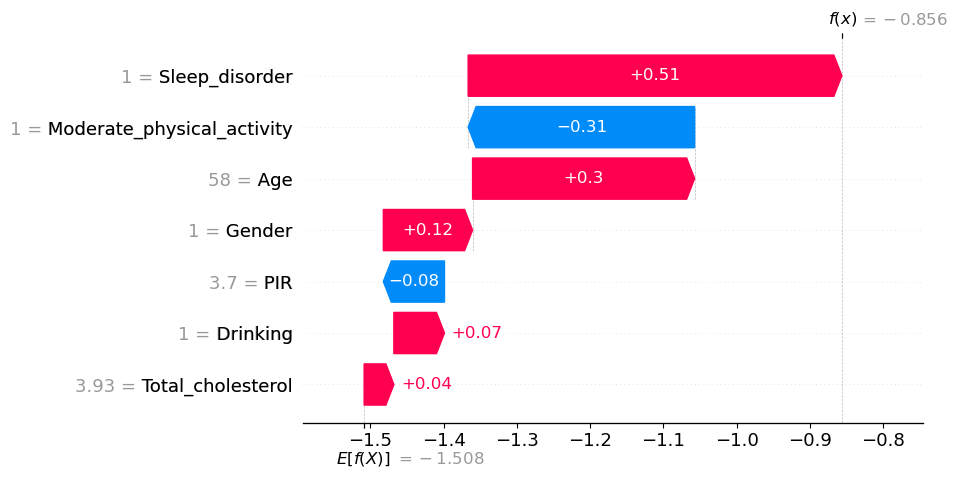

In [45]:
import shap

# 假设 shap_values 是计算得到的 SHAP 值，X_test 是您的测试特征数据
# 选择一个实例进行局部解释，例如选择第一个实例
instance_idx = 4  # 可以根据需要选择其他索引
shap_instance = shap_values[instance_idx]  # 获取该实例的 SHAP 值

# 绘制瀑布图
shap.waterfall_plot(shap_instance)


In [46]:
# 绘制单个样本的SHAP解释（Force Plot）
sample_index = 7  # 选择一个样本索引进行解释
shap.force_plot(explainer.expected_value, shap_values_test[sample_index], X_test.iloc[sample_index], matplotlib=True)


NameError: name 'shap_values_test' is not defined